In [1]:
import pandas as pd
import numpy as np
#from llama_index import SimpleDocument, GPTListIndex
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Load Cleaned Data

In [2]:
file_path = "..\\ChatGPT\\processed_data\\cleaned_predicted.csv"
print("Absolute Path:",os.path.abspath(file_path))

try:
    with open(file_path) as f:
        df = pd.read_csv(file_path)
        print("Dataframe Created from Cleaned File")
except FileNotFoundError:
    raise FileNotFoundError('The file does not exist.')


Absolute Path: C:\Users\pups_\SHOUMIK\Workspaces\Workspaces_Python_20240107\Projects\Kaggle Comp-Probability of Default\ChatGPT\processed_data\cleaned_predicted.csv
Dataframe Created from Cleaned File


### Separate out Training and Validation Data

In [3]:
### To be done

### Target Column Analysis

In [4]:
target_column='loan_status'

unique_items, counts = np.unique(df[target_column], return_counts = True)
# map the items to their counts
result = zip(unique_items, counts)

# print result
print('(Value, Count)')
for item in result:
    print(item)

(Value, Count)
(0, 21822)
(1, 6342)


### Features Analysis

In [5]:
numerical_columns=df.select_dtypes(include=np.number).columns.tolist()
if target_column in numerical_columns: numerical_columns.remove(target_column)
print(numerical_columns)

categorical_columns=df.select_dtypes(include=['category', 'object']).columns.tolist()
if target_column in categorical_columns: categorical_columns.remove(target_column)
print(categorical_columns)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


### Feature Extraction

In [6]:
# 1. Creating a new feature by using the existing onces like debt-to-income ratio (DTI) (Not required in this case)
# df['debt_to_income_ratio'] = df['loan_amnt'] / df['person_income']

new_categorical_columns=[]
new_numerical_columns=[]

### Handling Categorical Features

In [7]:
for categorical_column in categorical_columns:
    print(categorical_column,":",df[categorical_column].nunique(),":",df[categorical_column].unique())

#Label Encode categorical variables
label_encoder = LabelEncoder()
df['cb_person_default_on_file']= label_encoder.fit_transform(df['cb_person_default_on_file'])

# One-Hot Encode categorical variables
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
encoded_cats = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

person_home_ownership : 4 : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent : 6 : ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade : 7 : ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file : 2 : ['Y' 'N']


In [8]:
encoded_df.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Handling Numerical Features

In [9]:
# Standardize numerical features
scaler = StandardScaler()
scaled_numerics = scaler.fit_transform(df[numerical_columns])
scaled_df = pd.DataFrame(scaled_numerics, columns=numerical_columns)

In [10]:
# Combine transformed numerical and categorical features
processed_df = pd.concat([scaled_df, encoded_df, df[['cb_person_default_on_file']], df[[target_column]]], axis=1)

# Display first few rows of processed data
processed_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file,loan_status
0,-1.076616,0.051883,31.381855,4.317304,1.639221,3.859831,-0.686458,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
1,-1.332539,-1.824847,0.107833,-1.374920,0.051218,-0.702076,-1.059416,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,-0.308846,-1.824847,-0.952303,-0.621537,0.614178,3.673631,-0.686458,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
3,-0.820692,0.298821,-0.157201,4.317304,1.382147,3.301230,-1.059416,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
4,-0.564769,-0.122874,0.902936,4.317304,1.069753,3.487430,-0.313500,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1


C:\Users\pups_\AppData\Local\Temp\ipykernel_29836\671134193.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="coolwarm")


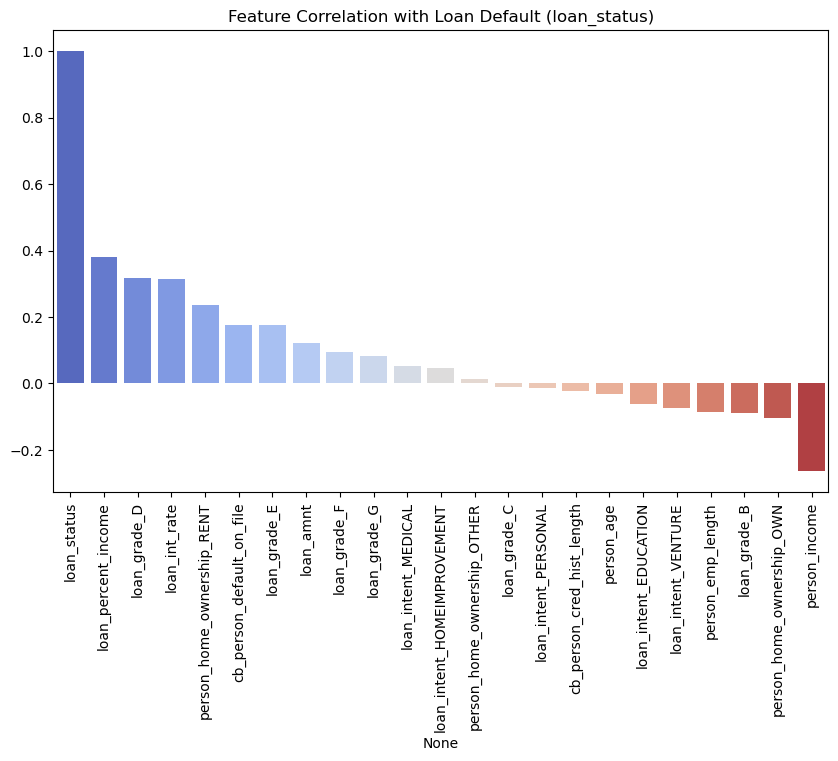

In [11]:
# Compute correlation matrix
corr_matrix = processed_df.corr()

# Get correlations with target variable (loan_status)
corr_with_target = corr_matrix[target_column].sort_values(ascending=False)

# Plot top correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Feature Correlation with Loan Default (loan_status)")
plt.show()

# Display the top correlated features numerically
#corr_with_target

In [12]:
filteredDf = corr_matrix[((corr_matrix >= .1) | (corr_matrix <= -.1)) & (corr_matrix !=1.000)]
filteredDf[target_column].sort_values(ascending=False)

loan_percent_income            0.381334
loan_grade_D                   0.318119
loan_int_rate                  0.315573
person_home_ownership_RENT     0.235807
cb_person_default_on_file      0.177252
loan_grade_E                   0.176590
loan_amnt                      0.122165
person_home_ownership_OWN     -0.103289
person_income                 -0.264095
person_age                          NaN
person_emp_length                   NaN
cb_person_cred_hist_length          NaN
person_home_ownership_OTHER         NaN
loan_intent_EDUCATION               NaN
loan_intent_HOMEIMPROVEMENT         NaN
loan_intent_MEDICAL                 NaN
loan_intent_PERSONAL                NaN
loan_intent_VENTURE                 NaN
loan_grade_B                        NaN
loan_grade_C                        NaN
loan_grade_F                        NaN
loan_grade_G                        NaN
loan_status                         NaN
Name: loan_status, dtype: float64

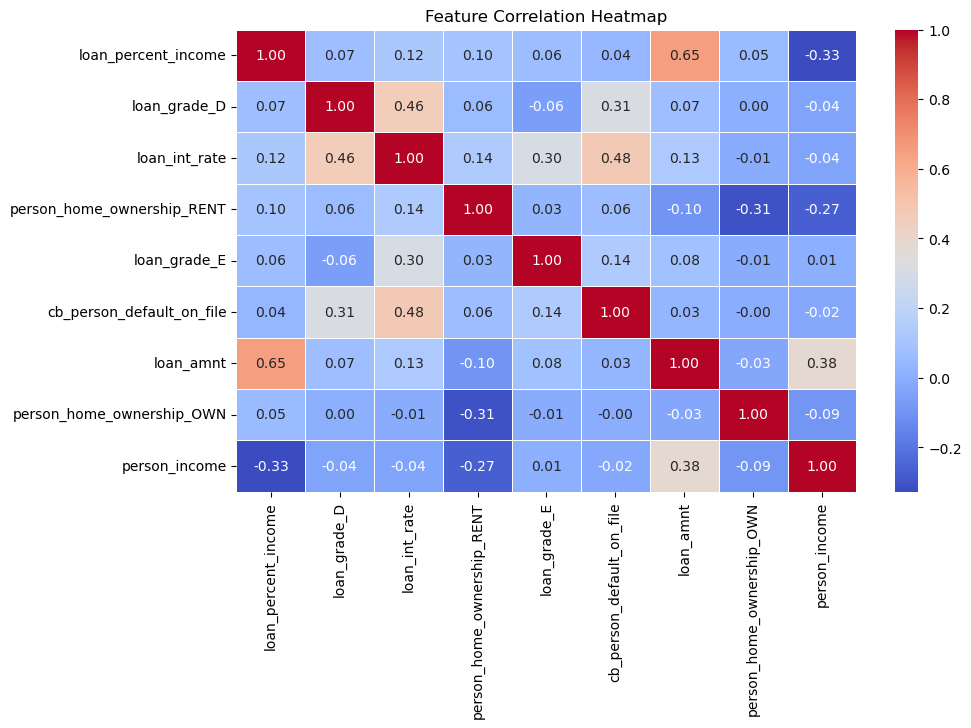

,Feature,VIF
0,loan_percent_income,5.255746
1,loan_grade_D,1.453447
2,loan_int_rate,1.569248
3,person_home_ownership_RENT,1.263351
4,loan_grade_E,1.174360
5,cb_person_default_on_file,1.485316
6,loan_amnt,5.565138
7,person_home_ownership_OWN,1.044682
8,person_income,3.609924


In [13]:
filtered_features=['loan_percent_income','loan_grade_D','loan_int_rate','person_home_ownership_RENT','loan_grade_E','cb_person_default_on_file',
                   'loan_amnt','person_home_ownership_OWN','person_income']


# Compute correlation matrix for selected features (excluding target variable)
corr_matrix_selected = processed_df[filtered_features].corr()

# Plot heatmap for correlation among selected features
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Compute VIF for each selected feature
vif_data = pd.DataFrame()
vif_data["Feature"] = processed_df[filtered_features].columns
vif_data["VIF"] = [variance_inflation_factor(processed_df[filtered_features].values, i) 
                    for i in range(len(vif_data["Feature"]))]

# Display VIF values
vif_data

In [14]:
# Creating the final dataset for modeling
final_df = processed_df[filtered_features + ['loan_status']]

# Display first few rows of final dataset
final_df.head()

final_df.to_csv('..\\ChatGPT\\processed_data\\feature_engineered.csv', index=False)